# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [32]:
reload(mdl)
reload(agt)

<module 'agent' from 'd:\\GitHub\\agent-based-modelling\\Project\\agent.py'>

[[0 0 2 2 0 0 1 0 0 2]
 [0 0 2 1 2 0 2 2 2 0]
 [0 0 2 0 1 1 1 2 0 2]
 [2 1 2 2 1 1 1 2 1 1]
 [2 1 2 2 1 2 1 1 1 0]
 [2 0 2 2 2 0 1 1 2 0]
 [1 0 0 1 0 2 0 2 1 0]
 [0 1 1 2 0 2 1 0 2 2]
 [1 1 2 1 2 2 1 0 0 0]
 [0 0 0 1 2 0 1 1 2 1]]


d:\GitHub\agent-based-modelling\Project\agent.py:60: RuntimeWarning: overflow encountered in scalar divide
  volume_add = self.base_growth_rate / self.volume + self.volume * fertility + self.volume / (volume_nbrs + 1e-6)


<Axes: >

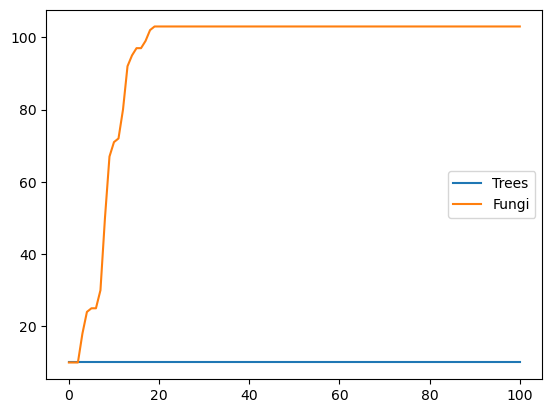

In [33]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 10
n_init_fungi = 10
model = mdl.Forest(width, height, n_init_trees, n_init_fungi)
model.run_model()

data = model.datacollector.get_model_vars_dataframe()
data.plot()

In [ ]:
reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [ ]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position [3 2]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 2 is being placed with
place_agent() despite already having the position [1 9]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 3 is being placed with
place_agent() despite already having the position [0 7]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 4 is being placed with
place

Cannot show ipywidgets in text

d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 101 is being placed with
place_agent() despite already having the position (2, 7). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 102 is being placed with
place_agent() despite already having the position (5, 8). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 103 is being placed with
place_agent() despite already having the position (7, 7). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 104 is being placed